## Matplotlib

**Charts to plot:**
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [44]:
titanic.shape

(1310, 14)

In [46]:
titanic.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
titanic.drop([1309],inplace=True)
titanic.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [48]:
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

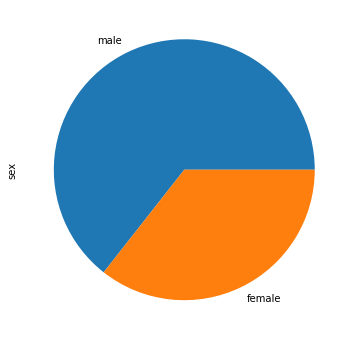

In [49]:
plt.figure(figsize=(6,6))
titanic['sex'].value_counts().plot(kind='pie')

In [50]:
x=titanic['sex'].value_counts()
x

male      843
female    466
Name: sex, dtype: int64

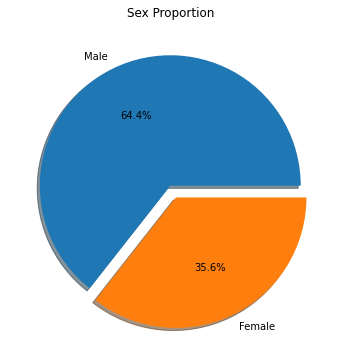

In [51]:
my_labels = 'Male','Female'
my_explode = (0, 0.1)
plt.figure(figsize=(6,6))
plt.pie(x.values.tolist(), labels=my_labels, autopct='%1.1f%%',shadow=True,explode=my_explode)
plt.title('Sex Proportion')
plt.show()

In [67]:
# handling nan values of age
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):

        if pclass == 1:
            return 37

        elif pclass == 2:
            return 29

        else:
            return 24

    else:
        return age

In [68]:
titanic['age'] = titanic[['age','pclass']].apply(impute_age,axis=1)

Text(0.5, 1.0, 'Fare paid and the Age')

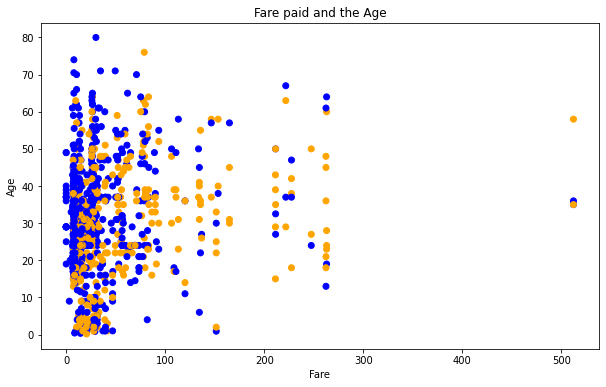

In [69]:
colors = {'male':'blue', 'female':'orange'}
s=titanic['sex'].apply(lambda x: colors[x])
plt.figure(figsize=(10,6))
plt.scatter(x=titanic['fare'],y=titanic['age'],c=s)
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Fare paid and the Age')

## Scipy

We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.

Task:

1.fitting it to the periodic function

2.plot the fit

Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [70]:
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

Text(0, 0.5, 'Min and max temperature')

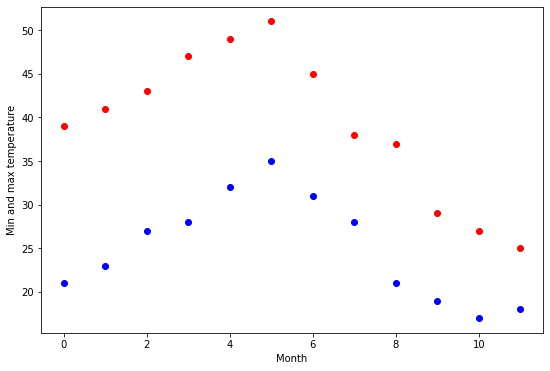

In [89]:
months = np.arange(12)
plt.figure(figsize=(9,6))
plt.plot(months, Max, 'ro')
plt.plot(months, Min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [83]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg+ampl * np.cos((times+time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,Min, [-40, 20, 0])

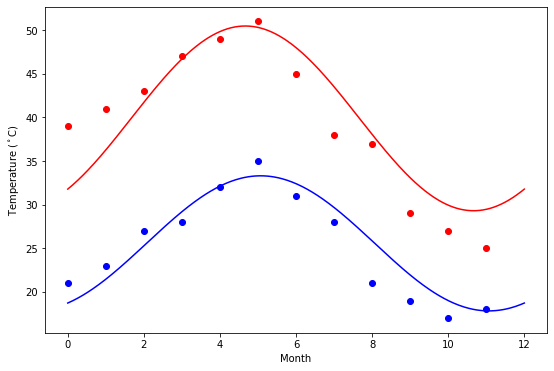

In [91]:
days = np.linspace(0, 12, num=365)
plt.figure(figsize=(9,6))
plt.plot(months, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()